In [1]:
import pandas as pd
filepath = "gs://my-bigdata-project-ra/landing"

In [2]:
# List of data files
filename_list = [
    'yellow_tripdata_2022-01.parquet',
    'yellow_tripdata_2022-02.parquet', 
    'yellow_tripdata_2022-03.parquet',
    'yellow_tripdata_2022-04.parquet',
    'yellow_tripdata_2022-05.parquet',
    'yellow_tripdata_2022-06.parquet',
    'yellow_tripdata_2022-07.parquet',
    'yellow_tripdata_2022-08.parquet',
    'yellow_tripdata_2022-09.parquet',
    'yellow_tripdata_2022-10.parquet',
    'yellow_tripdata_2022-11.parquet',
    'yellow_tripdata_2022-12.parquet'
  ]

In [3]:
def perform_EDA(df : pd.DataFrame, filename : str):
    """
    perform_EDA(df : pd.DataFrame, filename : str)
    Accepts a dataframe and a text filename as inputs.
    Runs some basic statistics on the data and outputs to console.
    Returns nothing.
    """
    print(f"{filename} Number of records: {df.count()}" )
    print(f"{filename} Number of duplicate records: { len(df)-len(df.drop_duplicates())}" )
    print(f"{filename} Info")
    print(df.info())
    print(f"{filename} Describe")
    print(df.describe())
    print("\n" + "-"*50 + "\n")
    print(f"{filename} Columns with null values")
    print(df.columns[df.isnull().any()].tolist())
    rows_with_null_values = df.isnull().any(axis=1).sum()
    print(f"{filename} Number of Rows with null values: {rows_with_null_values}" )
    integer_column_list = df.select_dtypes(include='int64').columns
    print(f"{filename} Integer data type columns: {integer_column_list}")
    float_column_list = df.select_dtypes(include='float64').columns
    print(f"{filename} Float data type columns: {float_column_list}")
    print("\n" + "-"*50 + "\n")
    print(f"{filename} Min pickup date: {df['tpep_pickup_datetime'].min()}")
    print(f"{filename} Max pickup date: {df['tpep_pickup_datetime'].max()}")
    print("\n" + "-"*100 + "\n")

In [4]:
for filename in filename_list:
    # Read in taxi trip data
    print(f"Working on file: {filename}")
    df = pd.read_parquet(f"{filepath}/{filename}")
    perform_EDA(df, filename)
    # remove the dataframe from memory
    #del df

Working on file: yellow_tripdata_2022-01.parquet
yellow_tripdata_2022-01.parquet Number of records: VendorID                 2463931
tpep_pickup_datetime     2463931
tpep_dropoff_datetime    2463931
passenger_count          2392428
trip_distance            2463931
RatecodeID               2392428
store_and_fwd_flag       2392428
PULocationID             2463931
DOLocationID             2463931
payment_type             2463931
fare_amount              2463931
extra                    2463931
mta_tax                  2463931
tip_amount               2463931
tolls_amount             2463931
improvement_surcharge    2463931
total_amount             2463931
congestion_surcharge     2392428
airport_fee              2392428
dtype: int64
yellow_tripdata_2022-01.parquet Number of duplicate records: 0
yellow_tripdata_2022-01.parquet Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
--- 

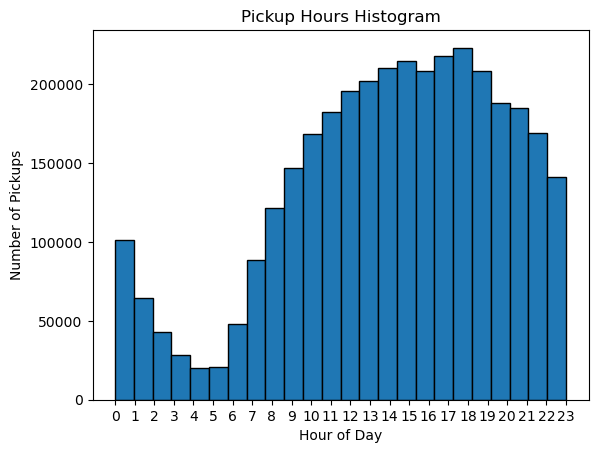

In [5]:
import matplotlib.pyplot as plt

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

plt.hist(df['pickup_hour'], bins=24, edgecolor='black')  
plt.title('Pickup Hours Histogram')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

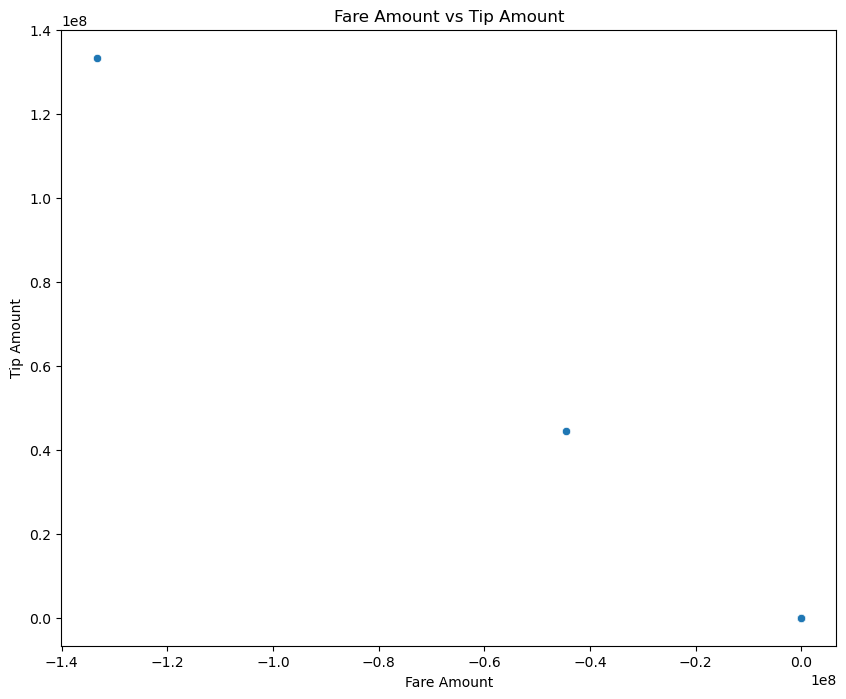

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(x='fare_amount', y='tip_amount', data=df)
plt.title('Fare Amount vs Tip Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.show()

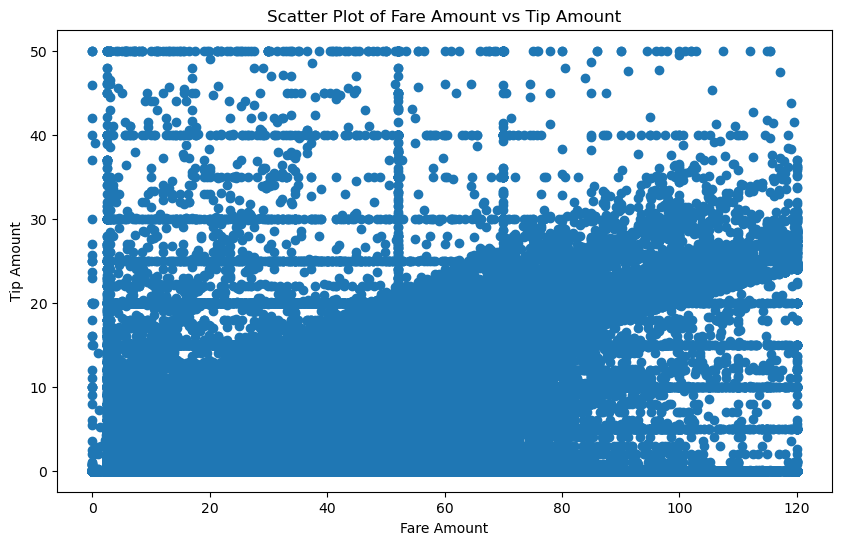

In [7]:
import matplotlib.pyplot as plt

fares = df[df['fare_amount'].between(0, 120)]
data_set = fares[fares['tip_amount'].between(0, 50)]

plt.figure(figsize=(10, 6))
plt.scatter(data_set['fare_amount'], data_set['tip_amount'])
plt.title('Scatter Plot of Fare Amount vs Tip Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.show()

In [8]:
import pandas as pd

filename_list = [
    'yellow_tripdata_2022-01.parquet',
    'yellow_tripdata_2022-02.parquet',
    'yellow_tripdata_2022-03.parquet',
    'yellow_tripdata_2022-04.parquet',
    'yellow_tripdata_2022-05.parquet',
    'yellow_tripdata_2022-06.parquet',
    'yellow_tripdata_2022-07.parquet',
    'yellow_tripdata_2022-08.parquet',
    'yellow_tripdata_2022-09.parquet',
    'yellow_tripdata_2022-10.parquet',
    'yellow_tripdata_2022-11.parquet',
    'yellow_tripdata_2022-12.parquet'
]

landing_folder = "gs://my-bigdata-project-ra/landing"
cleaned_folder = "gs://my-bigdata-project-ra/cleaned"

for filename in filename_list:
    print(f"Working on file: {filename}")
    
    df = pd.read_parquet(f"{landing_folder}/{filename}")
    
    print("Original Data:")
    print(df.describe())
    
    df['airport_fee'].fillna(0, inplace=True)
    
    df.dropna(subset=['fare_amount', 'tip_amount'], inplace=True)
    
    drop_columns = ['store_and_fwd_flag', 'payment_type', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']
    df.drop(columns=drop_columns, inplace=True)
    print(f"Dropped columns: {drop_columns}")
    
    print("\nCleaned Data:")
    print(df.describe())
    
    cleaned_filename = f"cleaned_{filename}"
    df.to_parquet(f"{cleaned_folder}/{cleaned_filename}")
    
    print(f"Cleaned data saved: {cleaned_folder}/{cleaned_filename}")
    print("\n" + "-"*50 + "\n")

Working on file: yellow_tripdata_2022-01.parquet
Original Data:
           VendorID  passenger_count  trip_distance    RatecodeID  \
count  2.463931e+06     2.392428e+06   2.463931e+06  2.392428e+06   
mean   1.707819e+00     1.389453e+00   5.372751e+00  1.415507e+00   
std    5.021375e-01     9.829686e-01   5.478714e+02  5.917573e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.040000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.740000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.130000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   3.061593e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  2.463931e+06  2.463931e+06  2.463931e+06  2.463931e+06  2.463931e+06   
mean   1.660768e+02  1.635807e+02  1.194449e+00  1.294648e+01  1.006710e+00   
std    6.546806e+01  7.079016e+01  5.001778e-01  2.558149e+02  1.236226e+00  